## ConnectTel Telecom Company
### Customer-Churn Prediction Analysis

In [88]:
# Import neccessary libraries
# For Data Analysis
import pandas as pd
import numpy as np
import missingno as msno # Missing data - Data Visualisation
from collections import Counter # Counting


#For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine learning using scikit-learn 
# Study on scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
# Machine learning alogorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score 
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, auc, precision_recall_curve,  precision_recall_fscore_support

# For warnings
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

In [89]:
# Read the data to a data frame
data_df = pd.read_csv("Customer-Churn.csv")

In [90]:
# view the data 
data_df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [91]:
# investigate the columns
columns = data_df.columns.to_list()
columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [92]:
# check for empty cells
data_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### There are no empty cells in the data.

In [93]:
# investigate the features/columns of the data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### TotalCharges is of datatype object and its suppose to be of type float , so next we convert the variable type to float.
### Data Preprocessing

In [94]:
# convert the TotalCharges variable datatype to float and use errors="coerce" to tackle errors
data_df["TotalCharges"] = pd.to_numeric(data_df["TotalCharges"], errors="coerce")
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. After the convertion of the TotalCharge feature datatype to float, 11 records has missing TotalCharge values as a result of conversion errors.(Because total customers : 7043, TotalCharges value count :7032)
2. To tackle this problem, we fill up the values of the TotalCharge with the median of the entire column since there no outliers .

In [95]:
# Count of missing value records
missing_count = data_df["TotalCharges"].isnull().sum()
# Display missing_count
print(f" The number of missing values in the record is : {missing_count}")
# The indexs/position of missing TotalCharges values
data_df[data_df["TotalCharges"].isnull()].index.to_list()

 The number of missing values in the record is : 11


[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [96]:
# fill missing records TotalCharge values with median
# Get the median
median_TotalCharges = data_df["TotalCharges"].median()
# Replace/fill empty values with the median
data_df["TotalCharges"] = data_df["TotalCharges"].fillna(median_TotalCharges)
# Check again for empty or missing values
data_df["TotalCharges"].isnull().sum()

0

In [97]:
# view data_df info to check for missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


There are no missing values now.

In [98]:
# describe the data for quick analytic insight for the   NUMERICAL FEATURES in transpose T
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.000,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


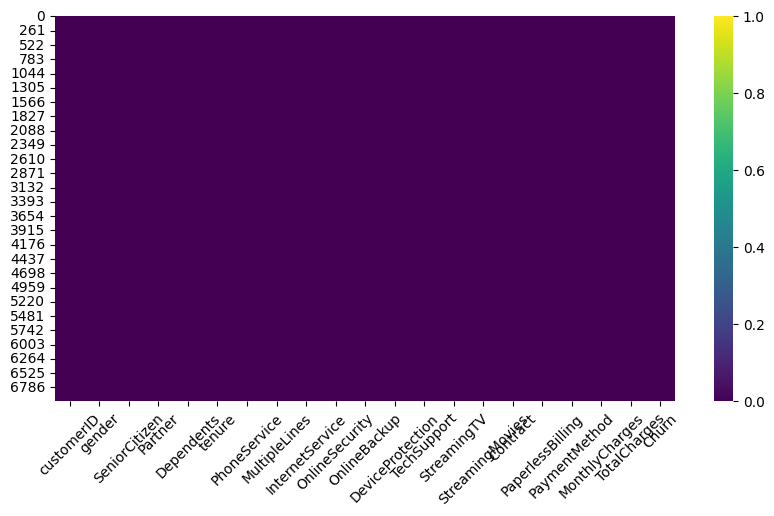

In [99]:
# Use visualizations to check if we have empty data cells.
plt.figure(figsize  =(10,5))
sns.heatmap(data = data_df.isnull(), cmap = "viridis", vmin = 0, vmax =1)
plt.xticks(rotation = 45)
plt.show();

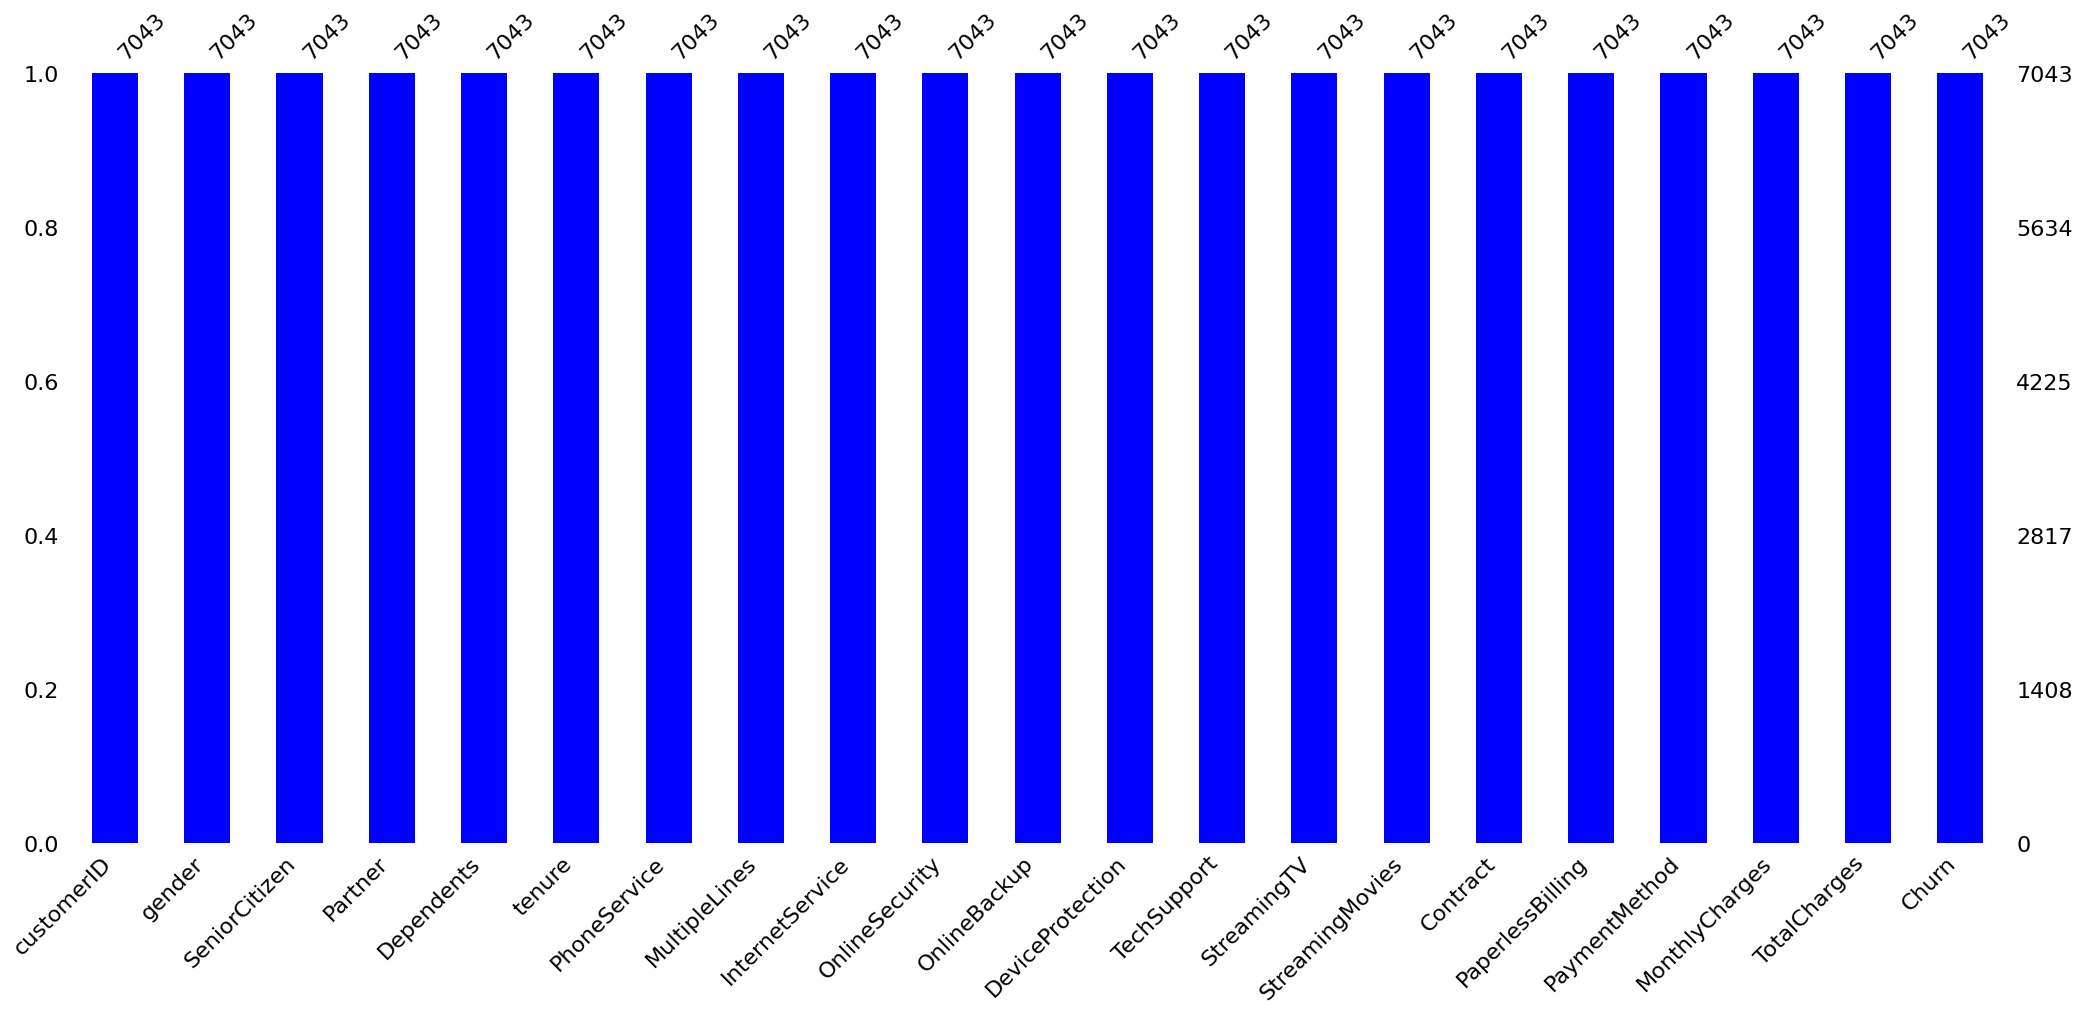

In [100]:
msno.bar(data_df, color="blue");

#### From the visualizations on the above cells, there are no empty cells

In [101]:
# check for duplicates on the customerid feature
print(data_df['customerID'].duplicated().sum())

0


#### There are no duplicated rows/record based on the CustomerID variable.
 Because this is a dimension table holding all the individual customers of the business, </br>
 it is expected that there will be no duplicated rows/record based on the CustomerID </br>
 variable. Hence we will not attent to delete rows/records based on duplicates.

In [102]:
# Segment the data in to numerical and categorical variables
# Numerical variables/features
numerical_data_df = data_df.select_dtypes(exclude="object")
numerical_data_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [103]:
# Categorical variables/features
categorical_data_df = data_df.select_dtypes(include="object")
# Drop the customerID feature as it will not add any insight to the model.
categorical_data_df.drop("customerID", axis=1, inplace=True)
categorical_data_df.head(2)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


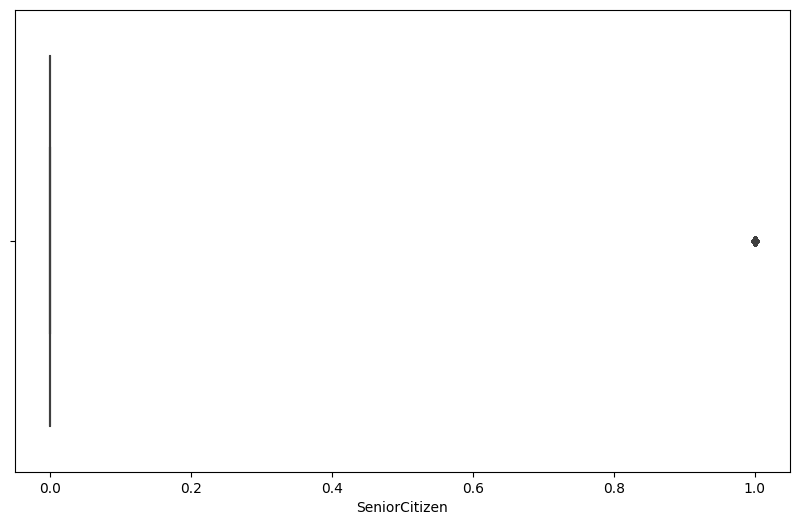

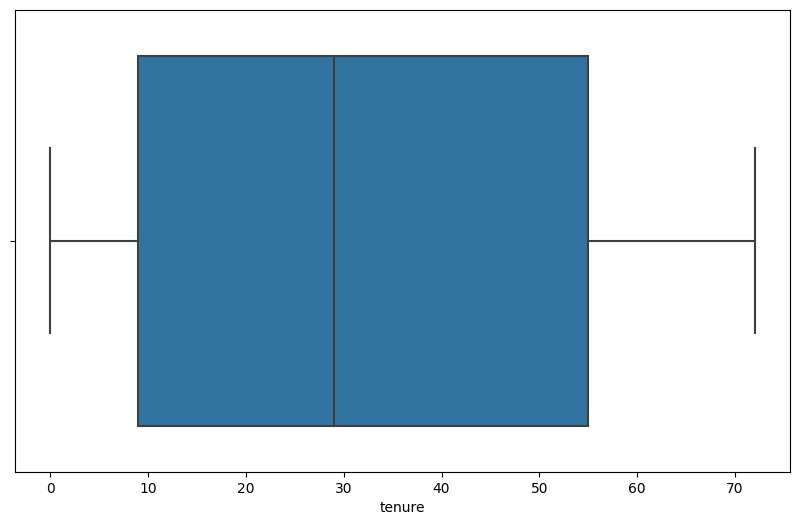

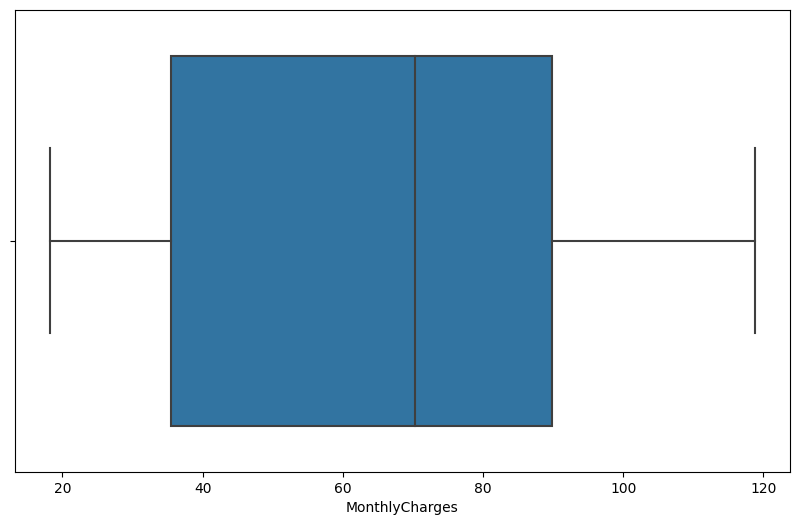

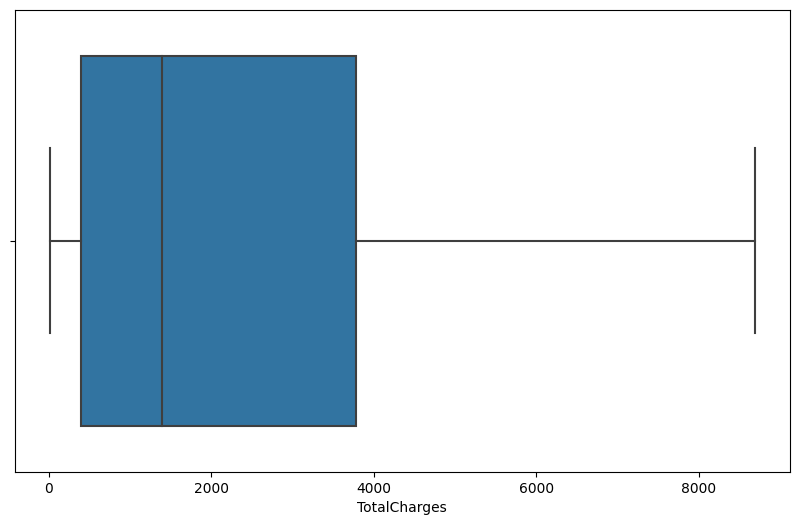

In [104]:
# explore the numerical_data_df to see if there are outliers in the data frames
for column in numerical_data_df:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data_df[column])

#### From the boxplot results in the above cells, we can see that there are not outliers in the numerical_data_df dataframes . As SeniorCitizen variable is already binary, its values are either 0 or 1.

## Exploratory Data Analysis (EDA)
### Univariate Analysis
#### Summary statistics: Check the distribution of numerical and categorical features.

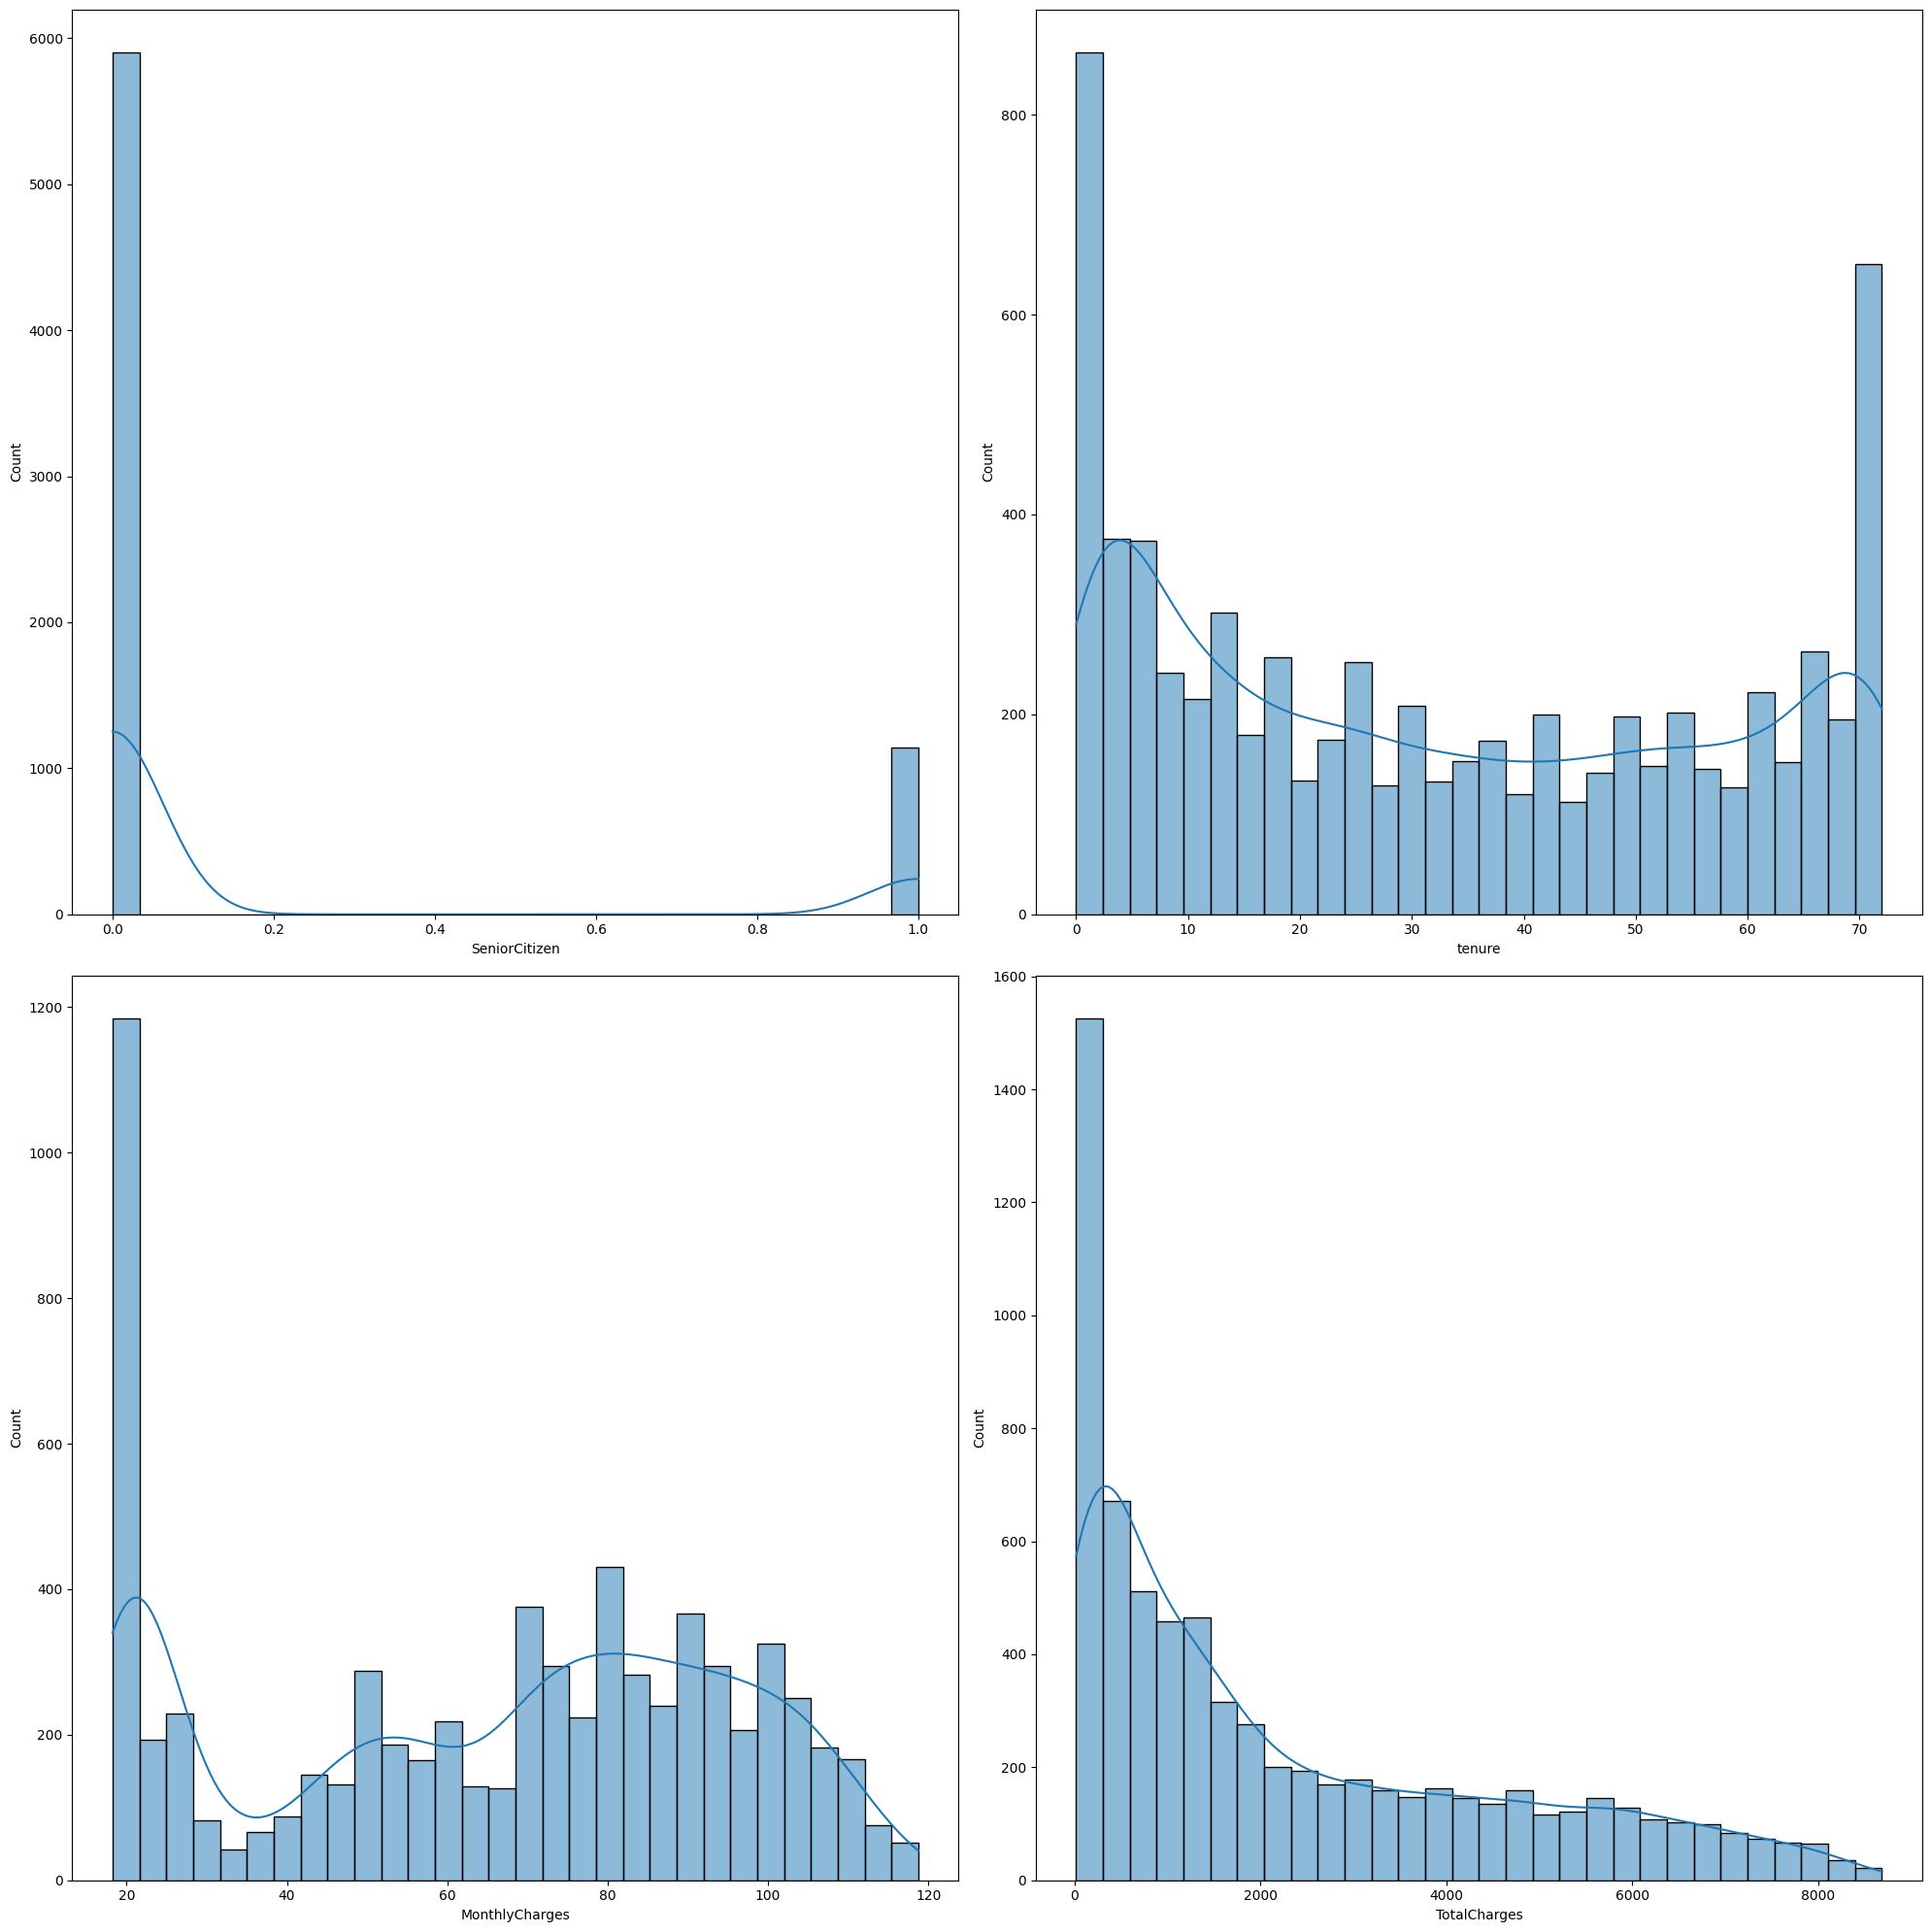

In [105]:
# Checking the distribution of numerical and categorical features
# For numerical features
n_features  =len(numerical_data_df.columns.to_list())
num_cols = 2
num_rows = (n_features + 1)//num_cols

fig, axes = plt.subplots(ncols= num_cols, nrows = num_rows, figsize = (20,20))

position  = axes.flatten()

for index, name_of_feature in enumerate(numerical_data_df):
    sns.histplot(data = numerical_data_df[name_of_feature], ax = position[index],kde=True, bins=30)
    
plt.tight_layout()

#### The distribution of the Numerical_data_df features is neither normal nor uniform, therefore meaning that we will use the RobustScaler to scale the values down before the training the model. 

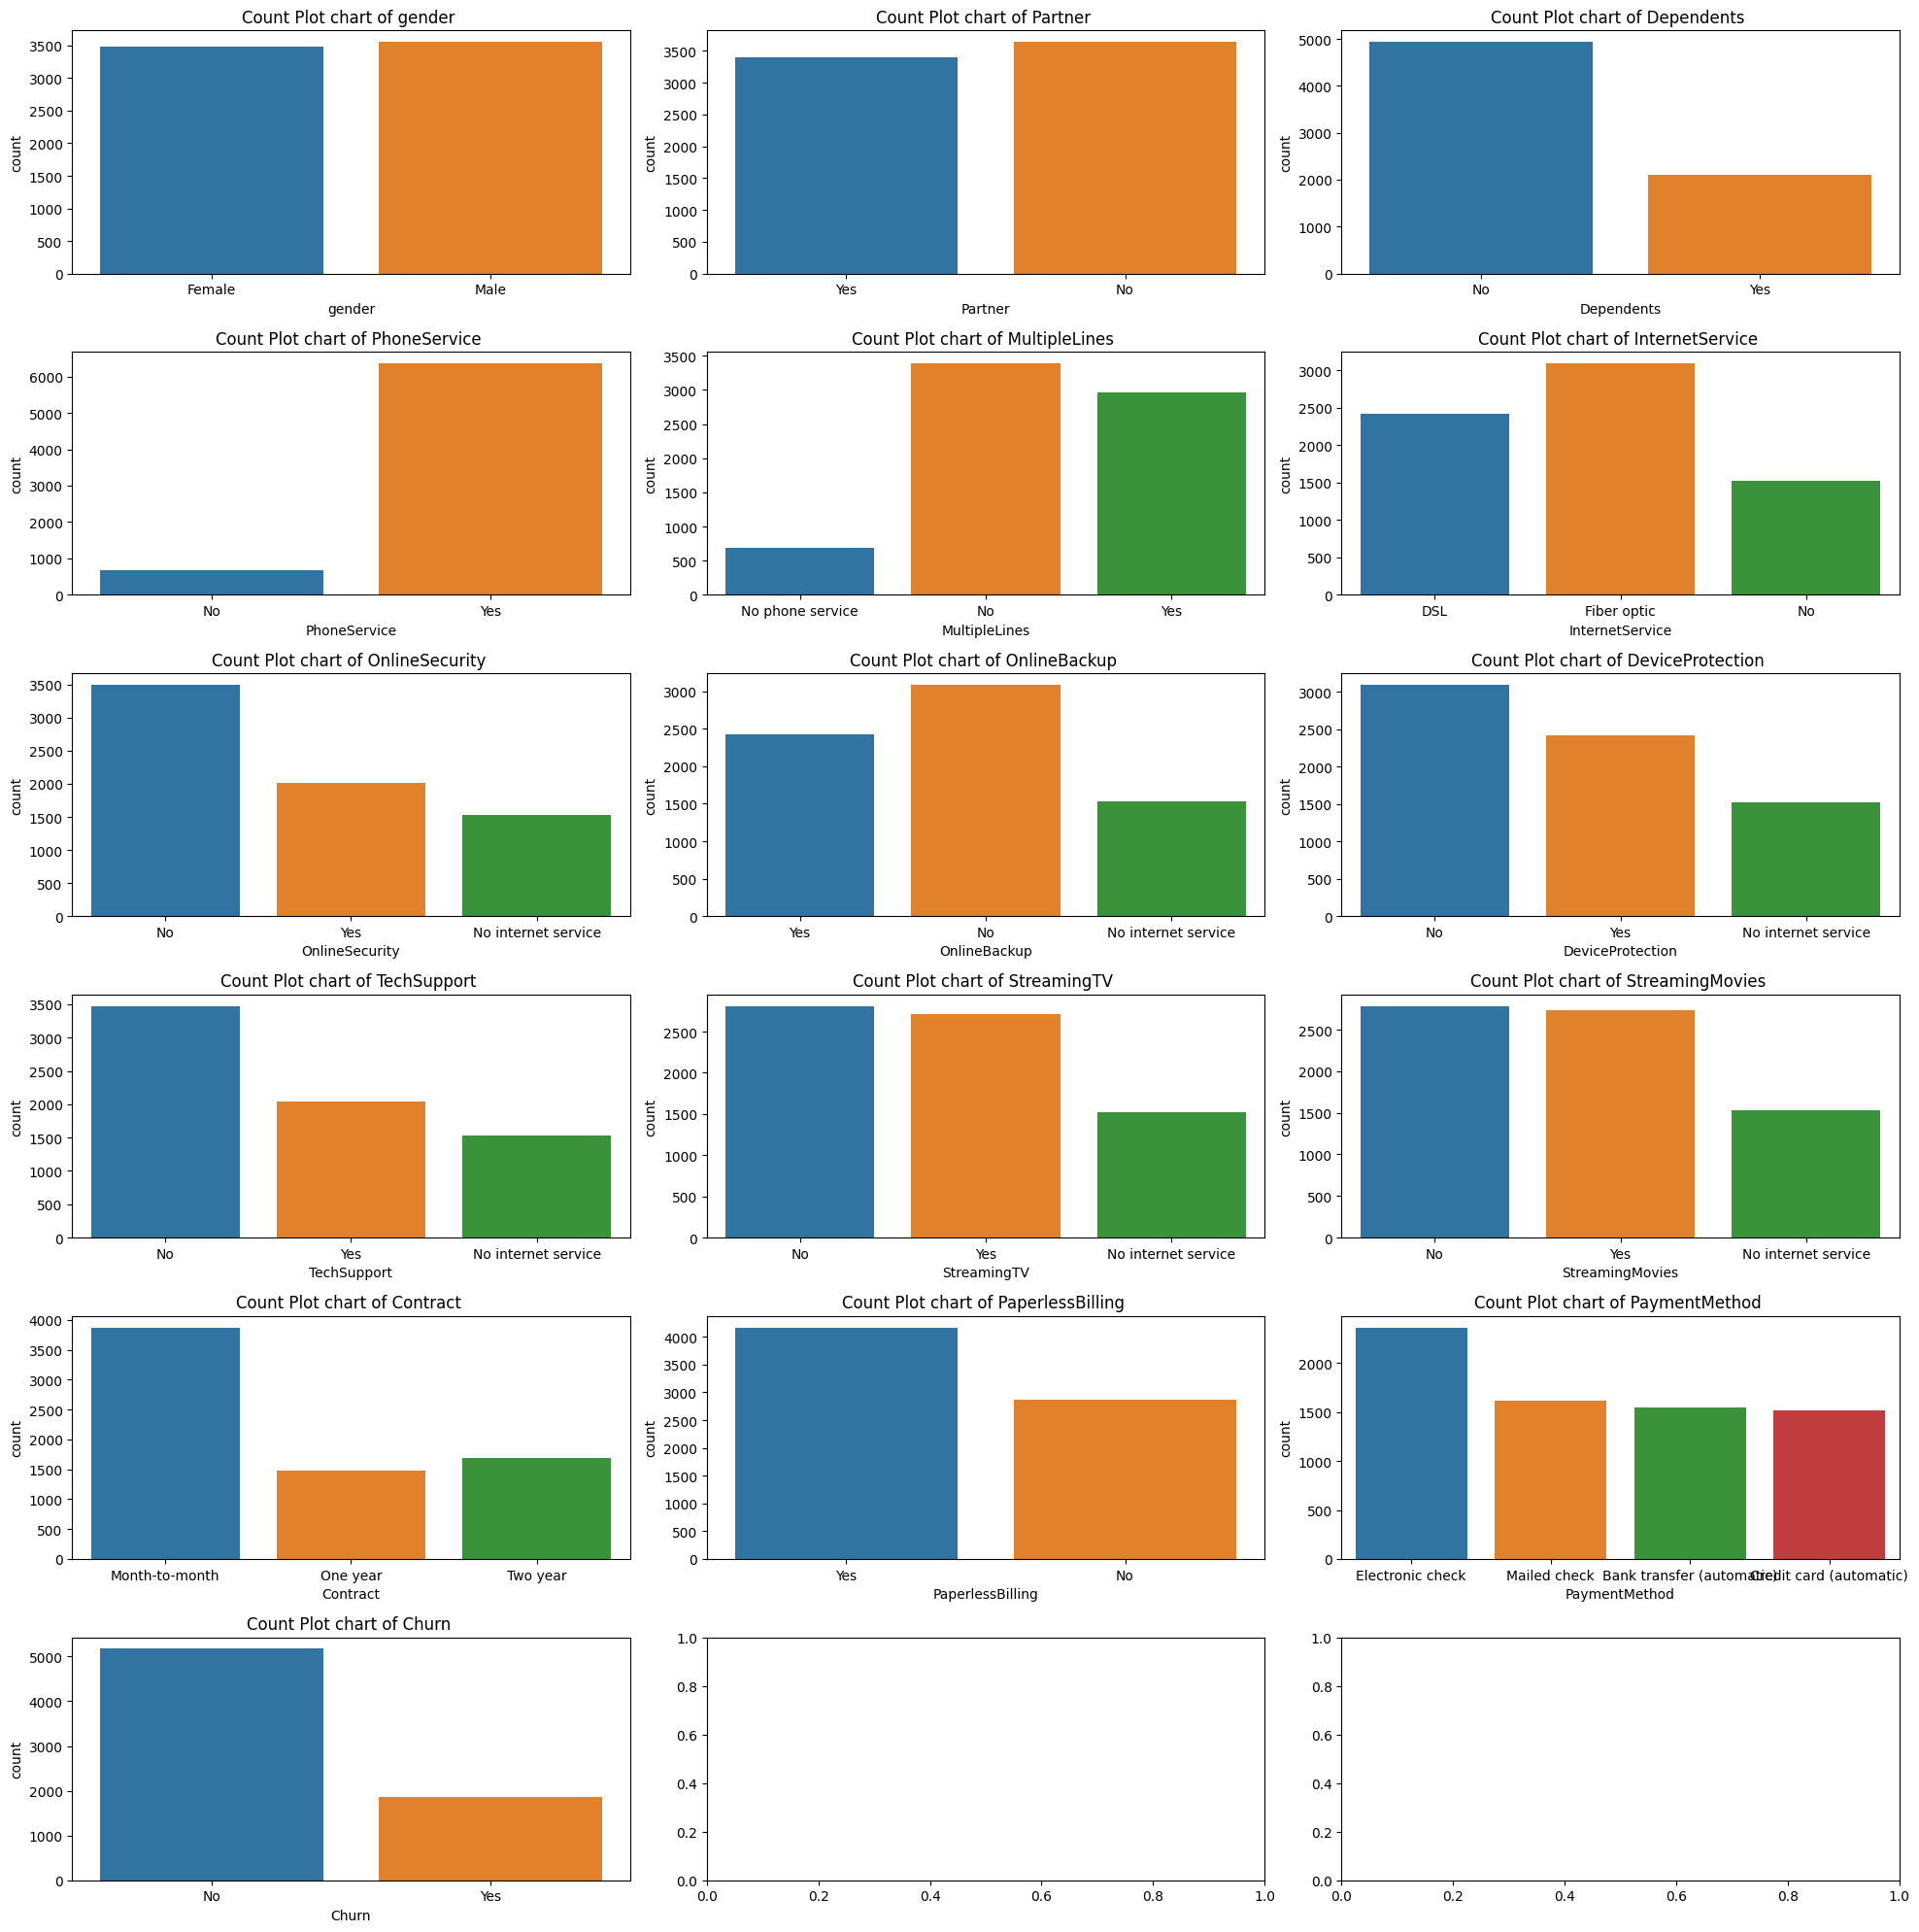

In [106]:
# For categorical features
# use a countplot to visualize categorical_data_df
#cat_columns = categorical_df.columns.to_list
fig, axes = plt.subplots(nrows= 6, ncols= 3, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(categorical_data_df):
    sns.countplot(data = categorical_data_df, x = feature,  ax = position[index])
    position[index].set_title(f"Count Plot chart of {feature} ")

plt.tight_layout()

 From the cell above, there are more customers with a "No" Churn value. This is to say that we have a greater proportion of the the customer distribution still with the company. 

In [107]:
# Investaging the proportion og churn of the data.
churn = len(data_df[data_df["Churn"] == "Yes"])
num_of_customers = len(data_df)
churn_rate = (churn/num_of_customers) * 100
print(f"The churn rate of customers for the data set is {churn_rate:.2f}% ")

The churn rate of customers for the data set is 26.54% 


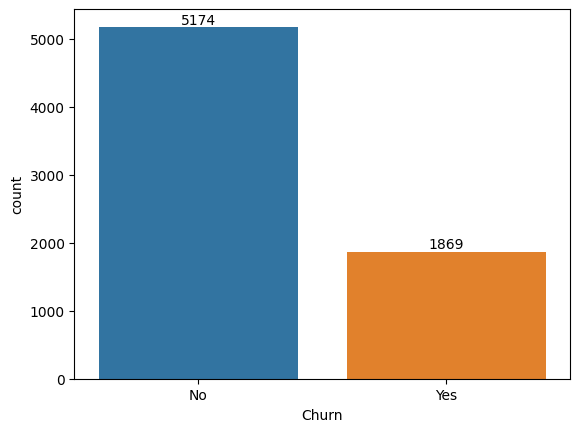

In [108]:
# Visualizing the target variable Churn
ax = sns.countplot(x=data_df["Churn"], order=data_df["Churn"].value_counts(ascending=False).index);
values = data_df["Churn"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

We have a 5174 customer count with "No" churn and 1869 with "Yes" churn , given raise to a 26.54% churn rate, and being that the average acceptable Churn Rate Benchmark is 5 - 7% ,ConnectTel Telecom faces a wide churn rate challenge.

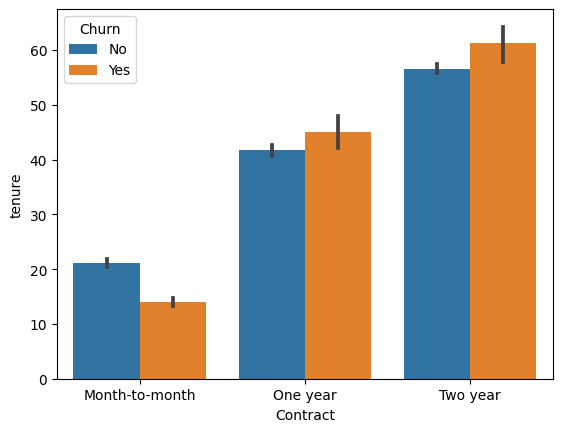

In [109]:
# Visualizing the target variable Churn
ax = sns.barplot(x=data_df["Contract"],y=data_df["tenure"], hue=data_df["Churn"]);


1. From the chart, the most churn rate in customers occured for customers with 2 years contract.
2. The average revenue per user (ARPU) is highest for customers with 2 years contract


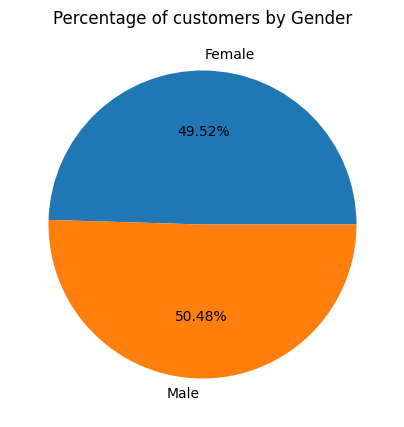

In [110]:
# Total customers by gender
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(data_df["gender"])
ax.pie(count.values(), labels= count.keys(), autopct=lambda p:f"{p:.2f}%" );
ax.set_title("Percentage of customers by Gender")
plt.show();


Number of male and female distribution in the data is almost equal with male occupying 50.48% and female 49.52%

### Bivariate Analysis

<Axes: >

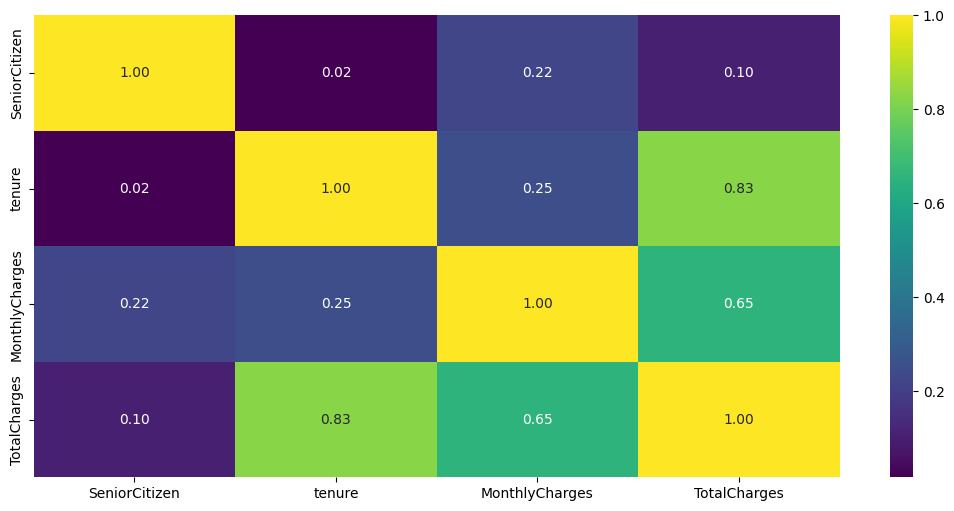

In [111]:
# Next we compare the individual features with the label variable churn to derive insights.
# use correlation to roughly visualize the relationships between numerical features
plt.figure(figsize = (13,6))
sns.heatmap(data=numerical_data_df.corr(), cmap = "viridis", annot=True, fmt=".2f")

The results shows a somewhat strong correlation between TotalCharge and tenure with a corr value of 0.83, and also a week correlation between the SeniorCitizen and tenure.

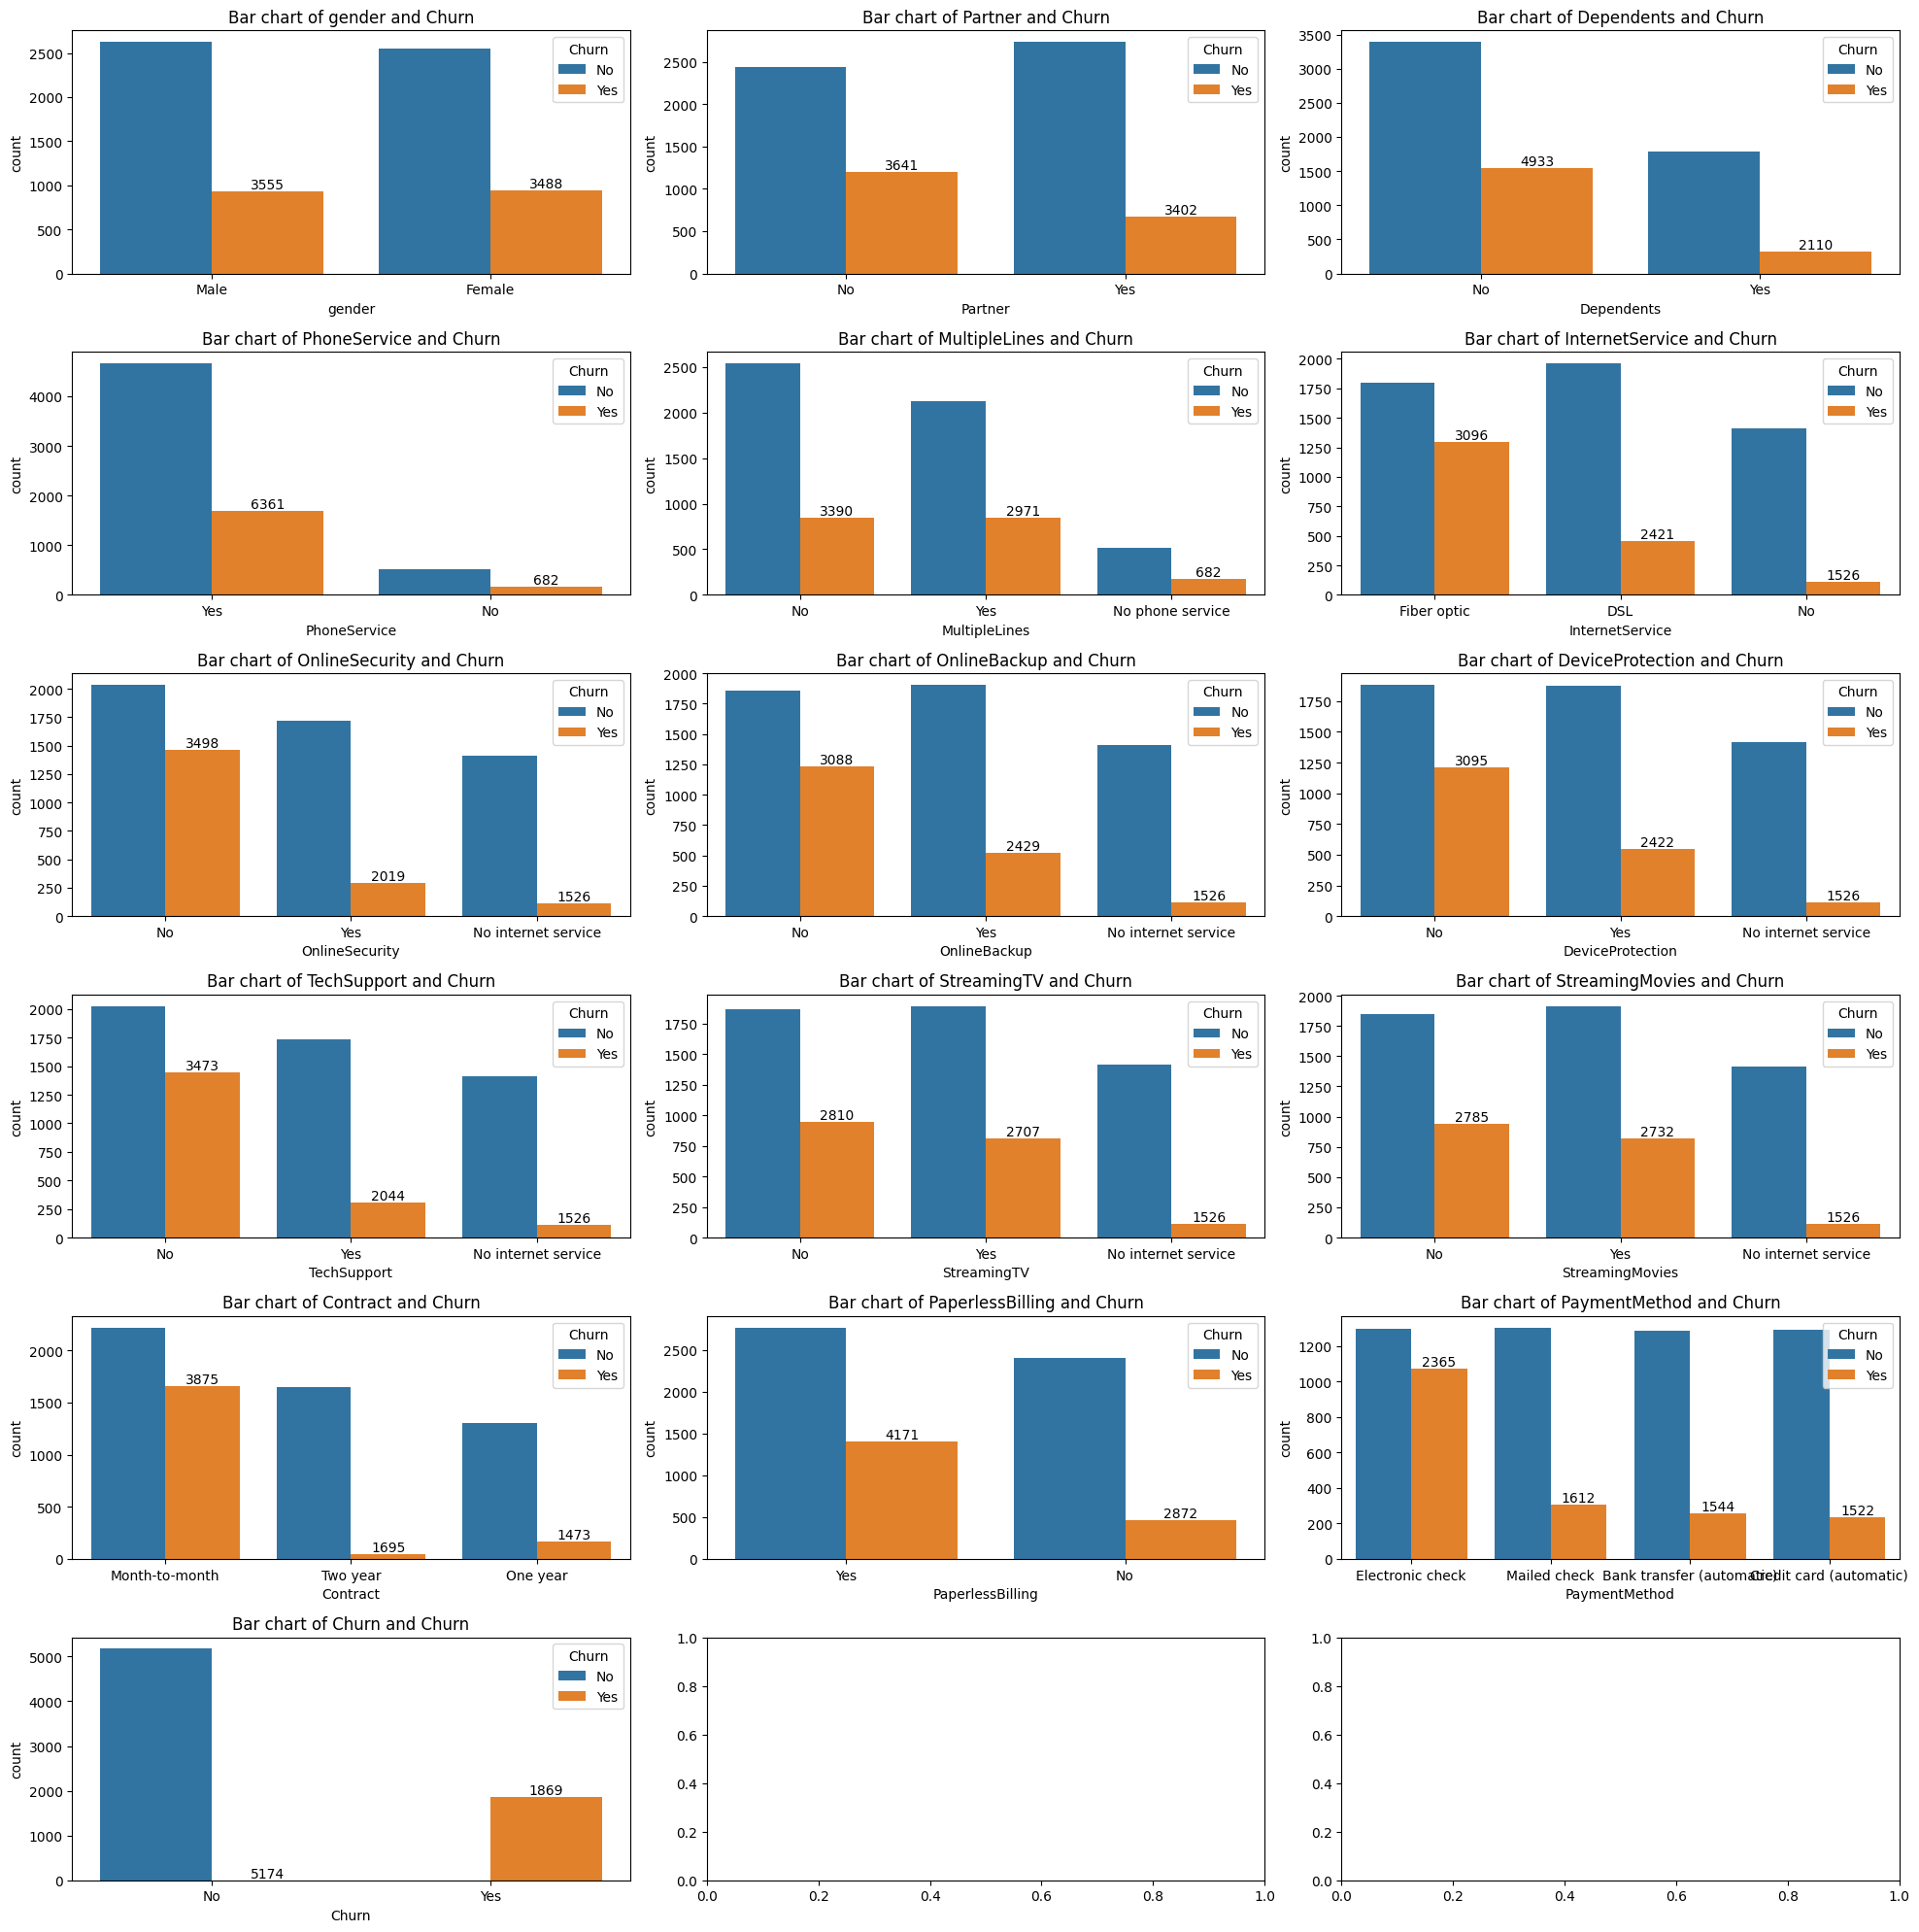

In [112]:
# use a countplot to visualize the categorical_data_df versus Churn
#cat_columns = categorical_df.columns.to_list
fig, axes = plt.subplots(nrows= 6, ncols= 3, figsize = (20,20))

position = axes.flatten()

for index, feature in enumerate(categorical_data_df):
    #sns.countplot(data = categorical_data_df, x = feature, hue = data_df["Churn"], ax = position[index],, order=data_df["Sales Person"].value_counts(ascending=False).index)
    #position[index].set_title(f"Bar chart of {feature} and Churn")

    ax = sns.countplot(data = categorical_data_df, x = feature, hue = data_df["Churn"], ax = position[index], order=data_df[feature].value_counts(ascending=False).index);
    values = data_df[feature].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[1], labels=values)
    position[index].set_title(f"Bar chart of {feature} and Churn");



plt.tight_layout()

1. Gender: Gender doesnot really show any correlation with the target variable churn.
2. Parter: More pecentage of customers with "No" partner has churn.
3. Dependants : More percentage of customers with "No" dependants has churn.
4. Phone Service: More percentage of customers with "Yes" phone service of about 6361 customers has churn as compared to 682 of the 'No" phone service that also has churn.
5. Multiplelines: Has no strong correlation with churn.
6. Internet Service: More percentage of customers with "Fibre Optics" internet service has churn.(Company should take a closer look at the service and ensure full functionality as it shows a great deal of  correlation with churn).
7. Online Security: More percentage of customers with "NO" online security has churn.
8. Online Backup: More percentage of customers with "NO" online backup has churn.
9. Device Protection: More percentage of customers with "NO" device protection has churn.
10. Tech Support: More percentage of customers with "NO" tech support has churn.
11. Streaming TV: More percentage of customers with "No" streaming TV has churn.
12. Streaming movies: More percentage of customers with "No" streaming movies has churn.
13. Contract: More percentage of customers with "Month to Month" contract has churn.
(Company should review the month to month contract for flaws and overall over charge.)
14. Paperless Billing: More percentage of customers with "Yes" paperless billing has churn.
15. Payment Method: More percentage of customers with "Electronic Check" payment method has churn.
(Company should check the Electronic Check system pathway for excessive data charges and request for customer feed back to track performance issues)

<Axes: >

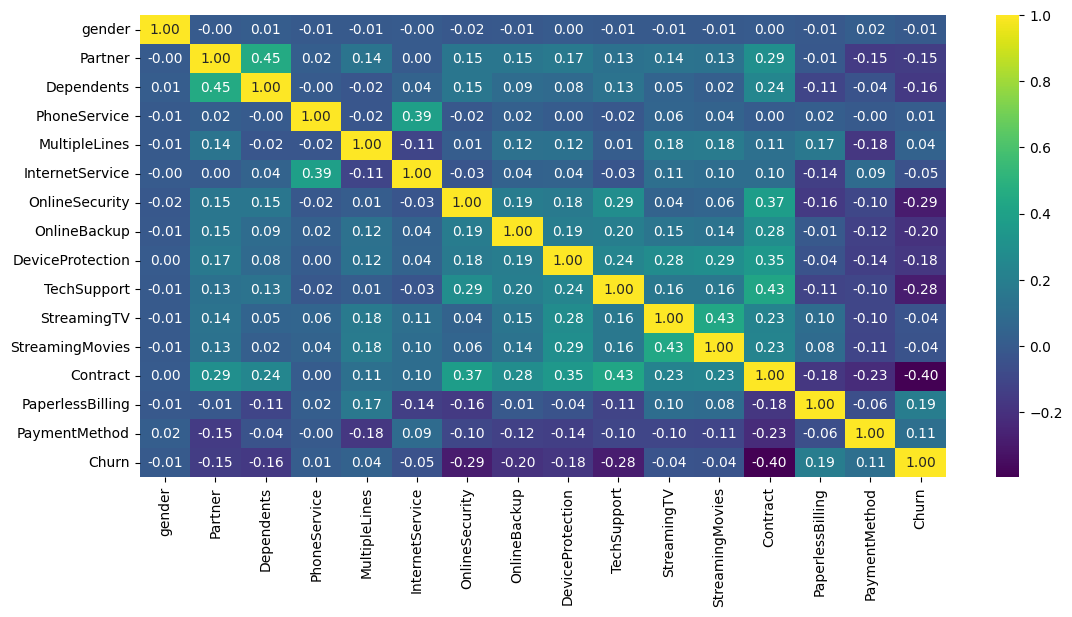

In [167]:
# To visualize the correlation in categorical_data_df

# We create new dataframe containing all the features categorical_data_df
categorical_data_df_corr = categorical_data_df

# Use encoder to convert the categorical variables to numerical
#Initialize the Labelencoder
encoder = LabelEncoder()

# Next we use a loop to go through the data_df and convert categorical features
# to numerical .
for col in categorical_data_df_corr.columns:
    if categorical_data_df_corr[col].dtype == 'object':
        categorical_data_df_corr[col] = encoder.fit_transform(categorical_data_df_corr[col])  
# view the now encoded data_df
categorical_data_df_corr.head(5)        
 
# then use the correlation function to calculate the correlation between the features
plt.figure(figsize = (13,6))
sns.heatmap(data=categorical_data_df_corr.corr(), cmap = "viridis", annot=True, fmt=".2f")



In [113]:
# View the numerical_data_df
numerical_data_df.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


In [114]:
# To compare the numerical variables with target variable churn in visualization
# We include a numerical column feature of the target variable Churn to the numrical_data_df
# in order to observe a correlation between them. 

#Initialize the encoder
encoder = LabelEncoder()
#Encode the target variable churn
numerical_data_df['Churn'] = encoder.fit_transform(data_df["Churn"])
# view the numerical_data_df to make sure
numerical_data_df.head(5)
                                                                     


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1


<Axes: >

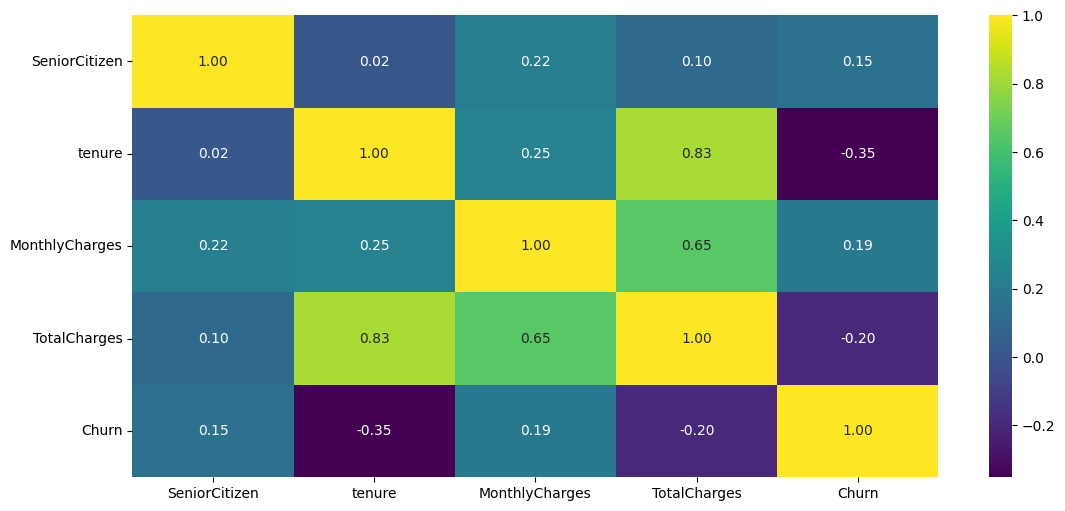

In [115]:
# To make a comparison between the numerical_data_df, we use correlation in visualization
# use correlation to roughly visualize the relationships between numerical features
plt.figure(figsize = (13,6))
sns.heatmap(data=numerical_data_df.corr(), cmap = "viridis", annot=True, fmt=".2f")

1. TotalCharge has a -0.20 correlation with churn.
2. MonthlyCharges has a 0.19 correlation with churn.
3. Tenure has a -0.35 correlation with churn.
4. SeniorCitizen has a 0.15 correlation with churn.
5. Strongest positive correlation of 0.83 occurs between tenure and TotalCharge.

In [116]:
# To further visualize this relationships, we create categorical variables, 
# to compute/categorize the individual values of the numerical features.

# To do this, we create functions to create these mappings
# For tenure feature
def cat_tenure(x):
    if x <= 30:
        return "0-30"
    elif x <= 60 :
        return "31-60"
    else:
        return "over 60"
# For MonthlyCharges feature
def cat_monthly_charges(x):
    if x <= 50:
        return "low 0-50"
    elif x <=100:
        return "medium 50-100"
    else:
        return "high 100+"
# For TotalCharges feature
def cat_total_charges(x):
    if x <= 3000:
        return "low 0-3000"
    elif x <= 5000:
        return "medium 3000-5000"
    else:
        return "high 5000+"
# create the new columns and apply the functions
numerical_data_df["cat_tenure"] = numerical_data_df["tenure"].apply(cat_tenure)
numerical_data_df["cat_monthly_charges"] = numerical_data_df["MonthlyCharges"].apply(cat_monthly_charges)
numerical_data_df["cat_total_charges"] = numerical_data_df["TotalCharges"].apply(cat_total_charges)

# view the new numerical_data_df
numerical_data_df.head(5)



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,cat_tenure,cat_monthly_charges,cat_total_charges
0,0,1,29.85,29.85,0,0-30,low 0-50,low 0-3000
1,0,34,56.95,1889.50,0,31-60,medium 50-100,low 0-3000
2,0,2,53.85,108.15,1,0-30,medium 50-100,low 0-3000
3,0,45,42.30,1840.75,0,31-60,low 0-50,low 0-3000
4,0,2,70.70,151.65,1,0-30,medium 50-100,low 0-3000


In [117]:
# view feature/variable names of the numerical_data_df
numerical_data_df.columns.to_list()

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'cat_tenure',
 'cat_monthly_charges',
 'cat_total_charges']

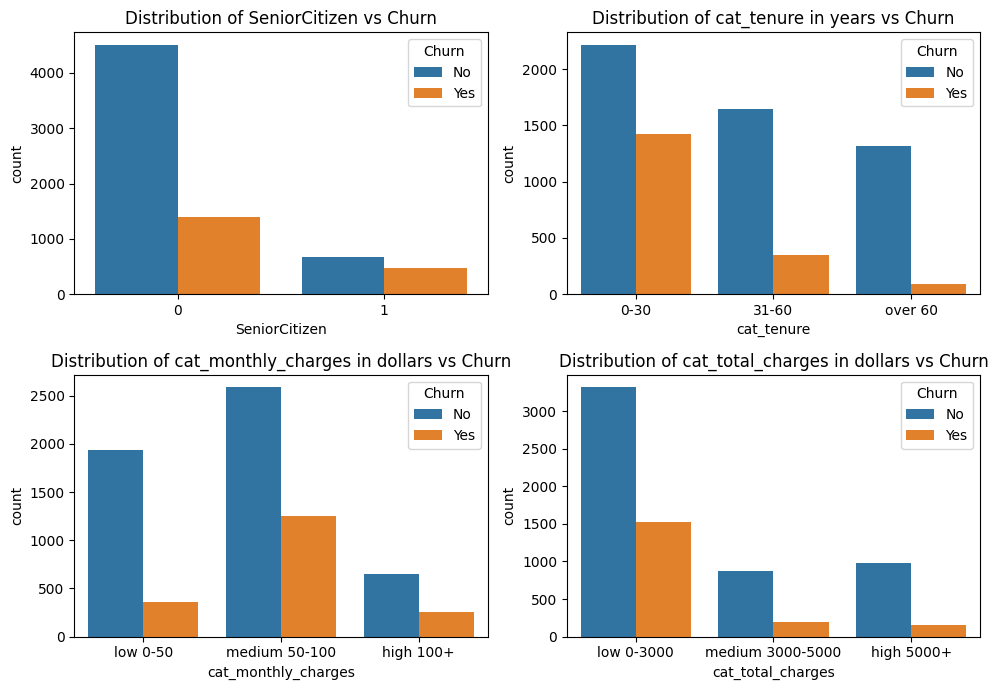

In [118]:
# To visualize the comparison using a count plot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,7))

sns.countplot(data = numerical_data_df, x = "SeniorCitizen", hue = data_df["Churn"], ax= axes[0,0]) 
axes[0,0].set_title("Distribution of SeniorCitizen vs Churn")

sns.countplot(data = numerical_data_df, x = "cat_tenure", hue = data_df["Churn"], ax=axes[0,1])
axes[0,1].set_title("Distribution of cat_tenure in years vs Churn")

sns.countplot(data = numerical_data_df, x = "cat_monthly_charges", hue = data_df["Churn"], ax=axes[1,0])
axes[1,0].set_title("Distribution of cat_monthly_charges in dollars vs Churn")

sns.countplot(data = numerical_data_df, x = "cat_total_charges", hue = data_df["Churn"], ax=axes[1,1])
axes[1,1].set_title("Distribution of cat_total_charges in dollars vs Churn")

plt.tight_layout() # to even distribute the spaces btw the charts
plt.show()

In [119]:
# Proportion calculations for numerical_data_df
def calculate_proportion(data, category):
    total = len(data)
    count = len(category)
    return (count / total) *100

# Applying this proportions
# For Tenure feature
data_tenure = numerical_data_df["cat_tenure"].isin(["0-30"])
category_tenure = numerical_data_df.loc[(numerical_data_df["cat_tenure"].isin(["0-30"])) & numerical_data_df["Churn"].eq(1)]
proportion_tenure = calculate_proportion(data_tenure, category_tenure)
print(f"The proportion for 0-30 years tenure is {proportion_tenure:.2f}%") # Output: 0.0

# For Monthly charges
data_monthly_charges = numerical_data_df["cat_monthly_charges"].isin(["medium 50-100"])
category_monthly_charges = numerical_data_df.loc[(numerical_data_df["cat_monthly_charges"].isin(["medium 50-100"])) & numerical_data_df["Churn"].eq(1)]
proportion_monthly_charges = calculate_proportion(data_monthly_charges, category_monthly_charges)
print(f"The proportion for medium 50-100 monthly charges is {proportion_monthly_charges:.2f}%") # Output: 0.0

# For Total_chargeS
data_cat_total_charge = numerical_data_df["cat_total_charges"].isin(["low 0-3000"])
category_cat_total_charge = numerical_data_df.loc[(numerical_data_df["cat_total_charges"].isin(["low 0-3000"])) & numerical_data_df["Churn"].eq(1)]
proportion_cat_total_charge = calculate_proportion(data_cat_total_charge, category_cat_total_charge)
print(f"The proportion for low 0-3000 total charge is {proportion_cat_total_charge:.2f}%") # Output: 0.0

# For SeniorCitizen
data_senior_citizen = numerical_data_df["SeniorCitizen"].isin([0])
category_senior_citizen = numerical_data_df.loc[(numerical_data_df["SeniorCitizen"].isin([0])) & numerical_data_df["Churn"].eq(1)]
proportion_senior_citizen = calculate_proportion(data_senior_citizen, category_senior_citizen)
print(f"The proportion for non-senior citizen is {proportion_senior_citizen:.2f}%") # Output: 0.0

The proportion for 0-30 years tenure is 20.23%
The proportion for medium 50-100 monthly charges is 17.82%
The proportion for low 0-3000 total charge is 21.57%
The proportion for non-senior citizen is 19.78%


1. TotalCharge: TotalCharge of less than 3000 dollars has the most churn occupying 21.57% of that category.
2. MonthlyCharges: Customers with a monthly charge of 50 - 100 dollars has the most churn occupying 17.82% of that category.
3. Tenure : Churn occured most for customers with less than 30 years in the company occupying 20.23% of that category.
4. SeniorCitizen : The most churn occured for non Senior Citizens occupying 19.78% of that category.


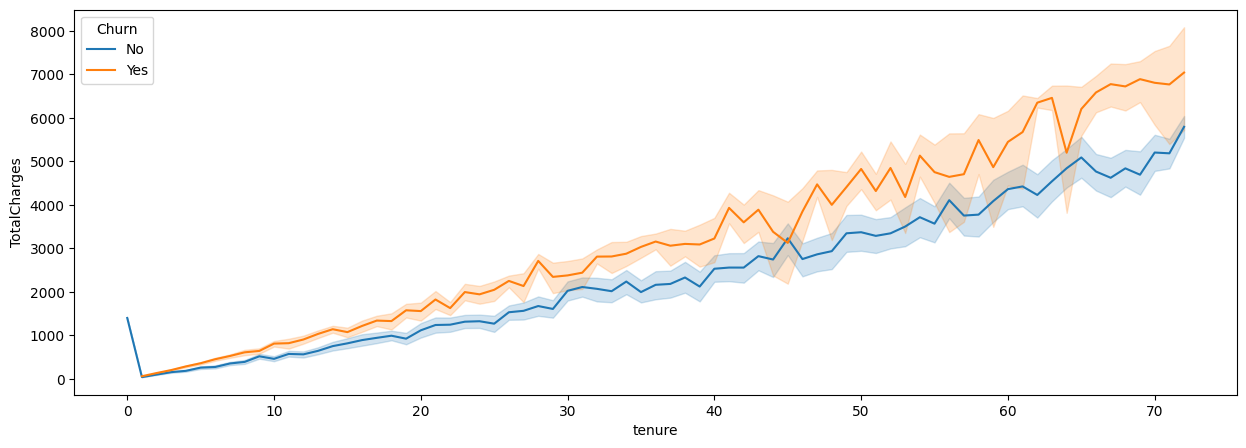

In [120]:
# Visualizing the monetory features over the time 
plt.figure(figsize=(15,5))

# Visualize using the lineplot
sns.lineplot(x="tenure", y="TotalCharges", data= numerical_data_df, hue=data_df["Churn"]);


1. From the graph, we observe that as the tenure in years increases, so does the Total Charges.
2. Churn drastically starts increasing from around 15 - 20 years in tenure.
3. The Total Charges also increases with the tenure, but at a slower rate than the Churn

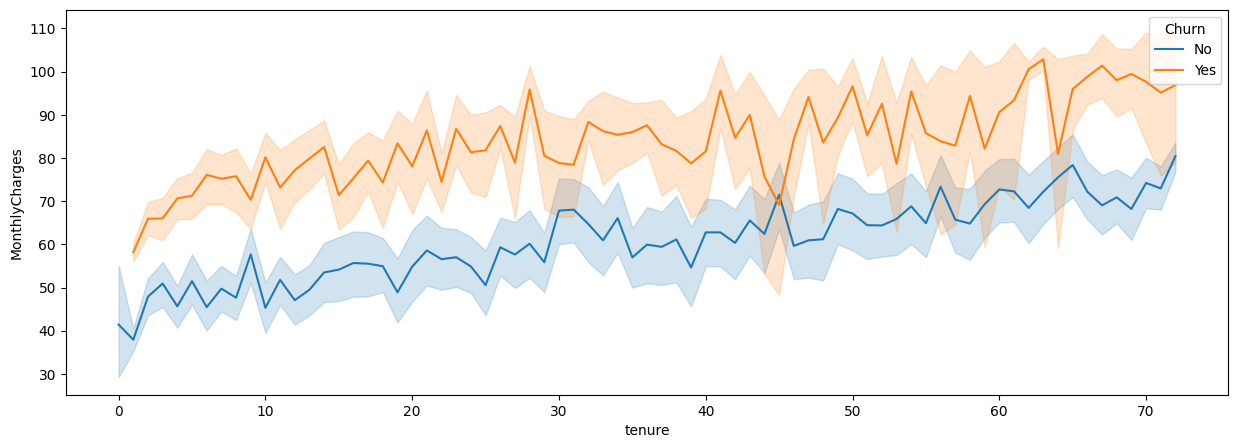

In [121]:
# Visualizing the monetory features over the time 
plt.figure(figsize=(15,5))

# Visualize using the lineplot
sns.lineplot(x="tenure", y="MonthlyCharges", data= numerical_data_df, hue=data_df["Churn"]);

1. The churn rate was higher for customers who paid higher monthly charges.
2. One of the major reasons for customer churn is high monthly charges.



### Feature Engineering

In [122]:
# Restore back the numerical features on on numerical_data_df
numerical_data_df = numerical_data_df.select_dtypes(exclude="object")
# Remove the churn from numerical_data_df as it was originally not included
numerical_data_df = numerical_data_df.drop("Churn",axis=1, inplace=True )
# view the output 
numerical_data_df

In [123]:
# view feature/variable names of the original data frame-data_df
data_df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [124]:
# Drop customerID because its not important to the model
data_df = data_df.drop("customerID",axis=1)
# view feature/variable names of the data frame-data_df
data_df.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [125]:
# Because most Machine Learning Algorithms cannot work with categorical data, 
# we convert all category features/variable to numerical using the Labelencoder.

#Initialize the Labelencoder
encoder = LabelEncoder()

# Next we use a loop to go through the data_df and convert categorical features
# to numerical .
for col in data_df.columns:
    if data_df[col].dtype == 'object':
        data_df[col] = encoder.fit_transform(data_df[col])  
# view the now encoded data_df
data_df.head(5)        


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


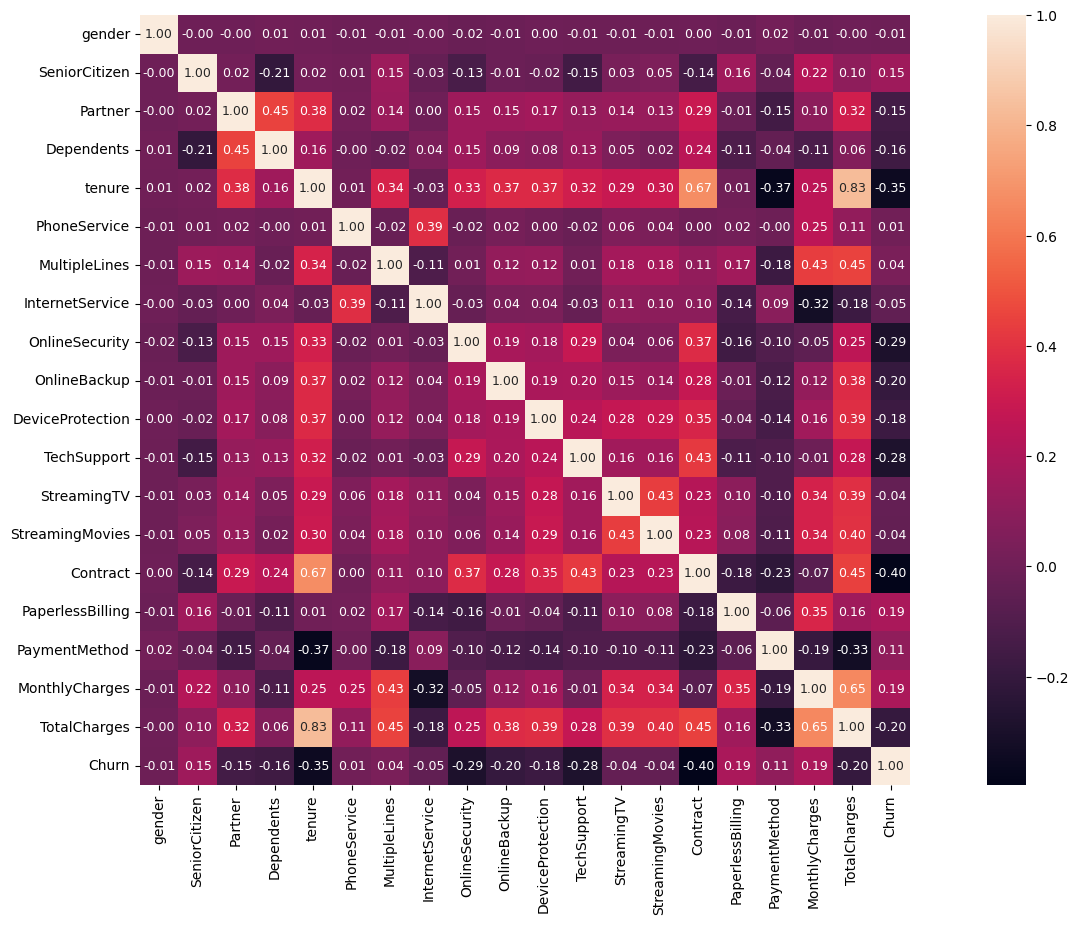

In [126]:
# Now that all the features are numerical, we can view the correlation between all features
# Correlation among features in the dataset.

plt.figure(figsize=(20,10))
hm = sns.heatmap(data= data_df.corr(),cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"fontsize":9, })

In [127]:
# In other to get optimum performance from our machine learning model,
# we need to normalize the values of some of the numerical features that is
# not categorical. This is because some of the numerical features have a very
# large range of values which can affect the performance of the model. We can
# use the MinMaxScaler from the sklearn library to normalize the values .
#   from sklearn.preprocessing import MinMaxScaler
# Create an instance of the MinMaxScaler class
#   scaler = MinMaxScaler()
# Fit the scaler to the data and transform the data
#   data_df["tenure"]= scaler.fit_transform(data_df["tenure"].values.reshape(-1,1))
#   data_df[ "MonthlyCharges"]=scaler.fit_transform(data_df[ "MonthlyCharges"].values.reshape(-1,1))
#   data_df["TotalCharges"]=scaler.fit_transform(data_df["TotalCharges"].values.reshape(-1,1))


# View the new data frame data_df with normalized values 
#   data_df.head()



#### Split the data into training and testing sets

In [128]:
# Split the data into features and labels
# Assign a seperate variable for the target feature/variable
labels = data_df["Churn"]
# Display the label
print(labels.head())
# Assign a seperate variable for the rest of the features excluding the target variable.
features = data_df.drop("Churn",axis=1)
# Display the feature
features.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [129]:
# confirm th feature datatypes
features.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [130]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
# features <==> X
# label <===> y
# X_train <==> train feature
# X_test<==> test feature 
# y_train <==> train labels
# y_test <==> test labels

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [131]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.800
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.450
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.450
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.950
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,1397.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.000
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.300
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.050
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.150


In [132]:
# In other to get optimum performance from our machine learning model,
# we need to normalize the values of the features that is not categorical. 
# This is because some of the numerical features have a very large range of
# values which can affect the performance of the model. We can use the 
# StandardScaler from the sklearn library to normalize the values of the
# numerical features.
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scaler = StandardScaler()
# Fit the scaler to the numerical features and transform them
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




#### Model Training

In [133]:
# We will use 3 learning models
# 1. Logistic Regression
# 2. Decision Tree Classifier
# 3. Random Forest Classifier

# First we create a classifiers list
classifiers = [
    [LogisticRegression(),"Logistic Regression"],
    [DecisionTreeClassifier(random_state=42),"Decision Tree"],
    [RandomForestClassifier(),"Random Forest"]   
]


In [134]:
# Next we initialize and train these 3 model simultaneously
# Iterate through classifiers - so as to automate the ML process at once
# create empty dictionaries for the various evaluation matrix for regression supervised ML
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}



# Iterate through classifiers to apply the 3 different ML algorithms at each loop.
for classifier in classifiers :
    model = classifier[0]
    model.fit(X_train_scaled,y_train)
    model_name = classifier[1]
    
    # Predict the output for the test data
    pred = model.predict(X_test_scaled)

    # initialize the evaluation matrix scores
    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred)

    # Convert the evaluation matrix scores into percentages
    acc_list[model_name]=([str(round(a_score*100,2)) + "%"])
    precision_list[model_name]=([str(round(p_score*100,2)) + "%"])
    recall_list[model_name]=([str(round(r_score*100,2)) + "%"])
    roc_list[model_name]=([str(round(roc_score*100,2)) + "%"])


    if model_name != classifiers[-1][1]:
        print("")

##### Output the result listS(Dictionary-dtype)
##### Then convert the dictionary to a DataFrame

In [135]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,Logistic Regression,Decision Tree,Random Forest
0,81.55%,72.6%,79.7%


In [136]:
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,Logistic Regression,Decision Tree,Random Forest
0,67.71%,48.35%,66.54%


In [137]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,Logistic Regression,Decision Tree,Random Forest
0,57.91%,50.94%,46.92%


In [138]:
print("ROC AUC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC AUC Score


,Logistic Regression,Decision Tree,Random Forest
0,73.98%,65.67%,69.21%


1. From the results, we can see that the Logistic Regression classifier is doing best. 

<Axes: xlabel='Churn', ylabel='count'>

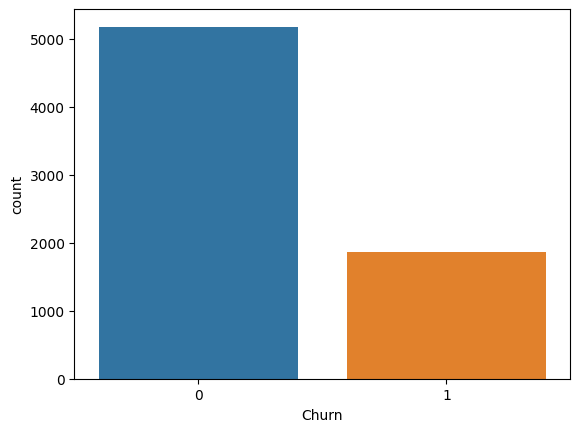

In [139]:
# lets observe the class weights of the target variable
sns.countplot(x="Churn", data=data_df )

Clearly the class imbalance is affecting the model's performance. </br>
Allocate class weights and train again.

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.63      0.76      1036
           1       0.47      0.90      0.61       373

    accuracy                           0.70      1409
   macro avg       0.71      0.77      0.69      1409
weighted avg       0.82      0.70      0.72      1409



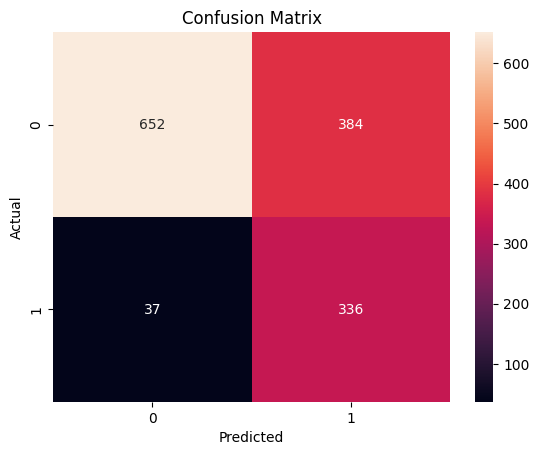

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.48      0.47      0.48       373

    accuracy                           0.72      1409
   macro avg       0.65      0.64      0.65      1409
weighted avg       0.72      0.72      0.72      1409



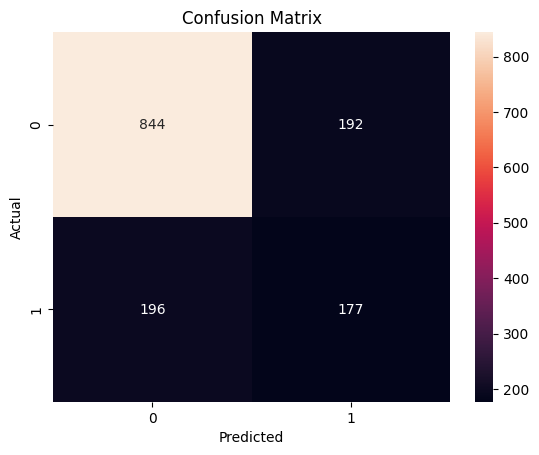

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.45      0.54       373

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409



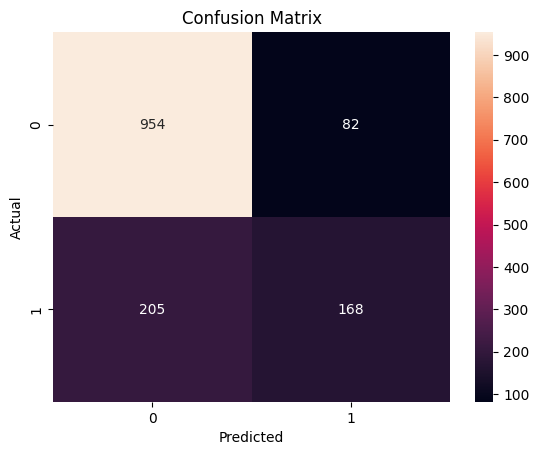

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


class_weights = {0: 1, 1: 4} 

# Initialize and train the models
classifiers = [[LogisticRegression(random_state=42, class_weight=class_weights), 'Logistic Regression'],
               [DecisionTreeClassifier(random_state=42, class_weight=class_weights), 'Decision Tree'],
               [RandomForestClassifier(random_state=42, class_weight=class_weights), 'Random Forest'],
              ]

for classifier in classifiers:
    model_name = classifier[1]
    model = classifier[0]
    print(f"<-- {model_name} -->")
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(data=matrix, annot=True, fmt=".6g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

Logistics regression is still performing best with and accuracy of :70% ,Precision : 47% , and Recall :90%  for class 1 Churn feature.
At this state; </br>
True Positive TP : 336 </br>
True Negative TP : 652 </br>
False Positive FP : 384 </BR>
False Negative FN : 37 </br>
The goal will be try and reduce FN AND increase TP as much as possible.

### Do we actually need all these features? 
#### Why don't we slim down the model size by selecting the most IMPORTANT features and train with them ?

#### Feature Importance and Feature Selection

In [141]:
# viewing the features again
features.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50


#### Feature importance is only possible if you have previously trained the model, just like we did.
#### We can now Use the .feature_importances_ function to identify the most important features.
#### It works only on tree baised ML algorithms like : RandomForestClassifier() and DecisionTreeClassifier()
#### So to do these , we use the RandomForestClassifier().

In [142]:
# Feature importance using Random Forest
importances = classifiers[2][0].feature_importances_
importances

array([0.02506091, 0.01634266, 0.0213997 , 0.01957514, 0.1524618 ,
       0.00617976, 0.0208897 , 0.03038241, 0.05951278, 0.02620009,
       0.02085651, 0.04922788, 0.01753646, 0.01687881, 0.11581041,
       0.02448344, 0.04882273, 0.16020124, 0.16817757])

In [143]:
len(importances) == len(features.columns)

True

#### Create a DataFrame to contain all the column names and their corresponding feature importance

In [144]:
feature_names = features.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df

,Feature,Importance
0,gender,0.025061
1,SeniorCitizen,0.016343
2,Partner,0.021400
3,Dependents,0.019575
4,tenure,0.152462
5,PhoneService,0.006180
6,MultipleLines,0.020890
7,InternetService,0.030382
8,OnlineSecurity,0.059513
9,OnlineBackup,0.026200


#### Sorting the data frame will be:

In [145]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
18,TotalCharges,0.168178
17,MonthlyCharges,0.160201
4,tenure,0.152462
14,Contract,0.115810
8,OnlineSecurity,0.059513
11,TechSupport,0.049228
16,PaymentMethod,0.048823
7,InternetService,0.030382
9,OnlineBackup,0.026200
0,gender,0.025061


#### Visualizing the important features

<Axes: xlabel='Importance', ylabel='Feature'>

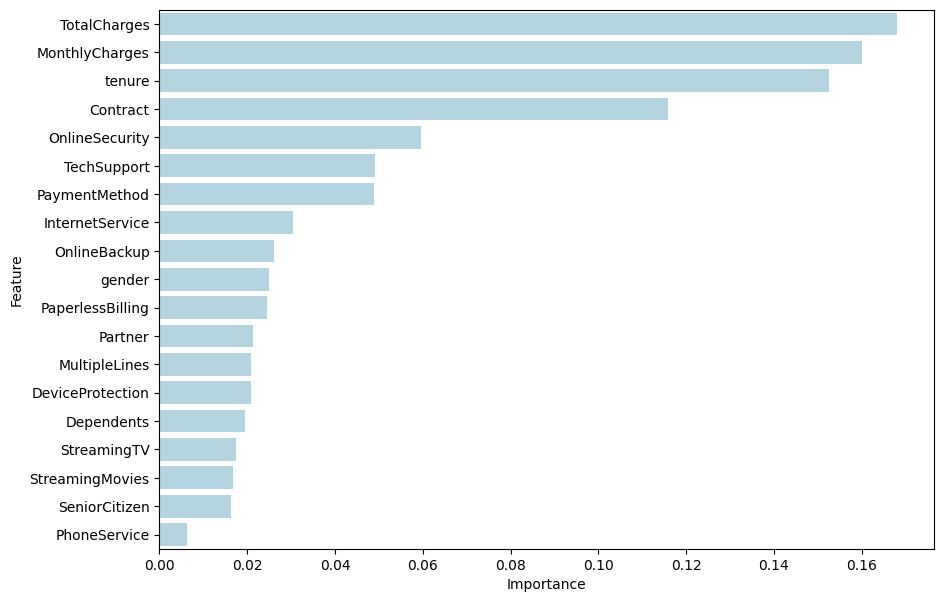

In [146]:
plt.figure(figsize=(10, 7))

sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='lightblue')

#### Let us select top 7 features and train the model with them.

In [147]:
selected_features = feature_importance_df[:7]
selected_features

,Feature,Importance
18,TotalCharges,0.168178
17,MonthlyCharges,0.160201
4,tenure,0.152462
14,Contract,0.115810
8,OnlineSecurity,0.059513
11,TechSupport,0.049228
16,PaymentMethod,0.048823


In [148]:
X_train[selected_features['Feature'].values]

,TotalCharges,MonthlyCharges,tenure,Contract,OnlineSecurity,TechSupport,PaymentMethod
2142,1336.800,64.85,21,1,2,0,3
1623,5129.450,97.20,54,2,0,0,0
6074,23.450,23.45,1,0,0,0,2
1362,237.950,70.20,4,0,0,0,2
6754,1397.475,61.90,0,2,2,2,0
...,...,...,...,...,...,...,...
3772,95.000,95.00,1,0,2,0,2
5191,2198.300,91.10,23,2,2,2,1
5226,306.050,21.15,12,0,1,1,2
5390,1200.150,99.45,12,0,0,0,2


In [149]:
# Indentify the train and test sets
Xtrain_top_seven = X_train[selected_features['Feature'].values]
Xtest_top_seven = X_test[selected_features['Feature'].values]

#### Scale the new top seven again

In [150]:
scaler = StandardScaler()

X_train_top_seven_scaled = scaler.fit_transform(Xtrain_top_seven)
X_test_top_seven_scaled = scaler.transform(Xtest_top_seven)

#### Train the model using the classifiers created earlier.

<-- Logistic Regression -->
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.61      0.74      1036
           1       0.45      0.91      0.61       373

    accuracy                           0.69      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.69      0.70      1409



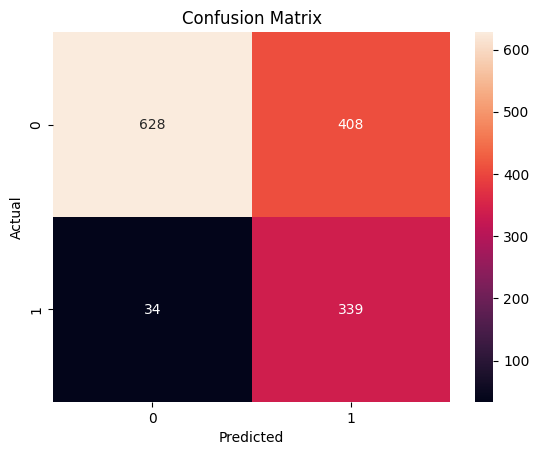

<-- Decision Tree -->
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1036
           1       0.52      0.52      0.52       373

    accuracy                           0.75      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409



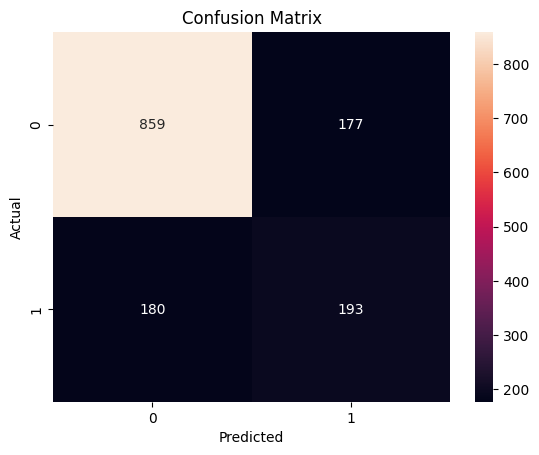

<-- Random Forest -->
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.63      0.49      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



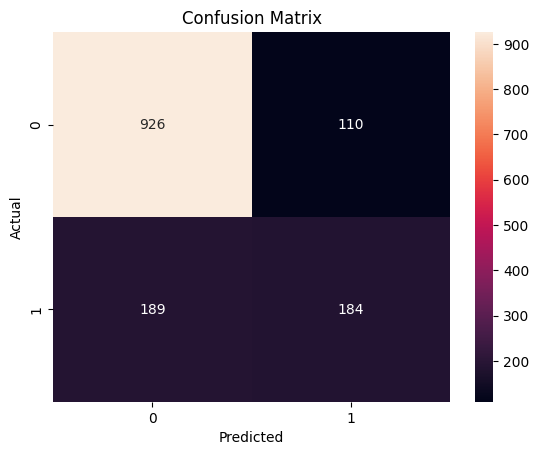

In [151]:
for classifier in classifiers:
    print(f"<-- {classifier[1]} -->")
    model_name = classifier[1]
    model = classifier[0]
    model.fit(X_train_top_seven_scaled, y_train)
    predictions = model.predict(X_test_top_seven_scaled)
    report = classification_report(y_test, predictions)
    matrix = confusion_matrix(y_test, predictions)
    print("Classification Report:\n", report)
    sns.heatmap(data=matrix, annot=True, fmt=".6g")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

From the results, selecting top 7 important features does not really much impact the performance of the model, so next, try to automate the process of selecting the best parameters to train the model.

#### To automate this process of selecting the best parameters to train the model , 
#### we perform hyperparameter tuning using GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForestClassifier()
param_grid = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [ 5, 7, 10],
    'class_weight': [{0:1, 1:4}, {0:1, 1:5}, {0:1, 1:6}]
}

grid_search = GridSearchCV(estimator=classifiers[2][0], param_grid=param_grid, cv=5, scoring="recall")
grid_search.fit(X_train_scaled, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': {0: 1, 1: 6}, 'max_depth': None, 'min_samples_split': 10}
Best Score: 0.73


In [153]:
grid_search.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 6}, min_samples_split=10,
                       random_state=42)

### Best RandomForestClassifier model ###
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      1036
           1       0.55      0.76      0.64       373

    accuracy                           0.77      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.77      0.78      1409


The ROC_AUC score :76.69%



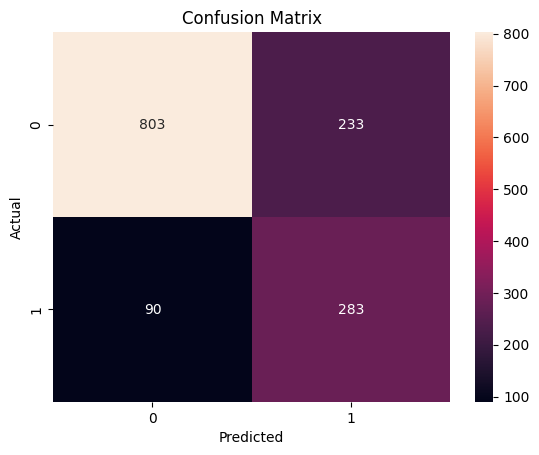

In [154]:
# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

report = classification_report(y_test, predictions)
matrix = confusion_matrix(y_test, predictions)
roc_score = roc_auc_score(y_test,predictions)
roc_score = roc_score *100

# Display results
print("### Best RandomForestClassifier model ###")
print("Classification Report:\n", report)
print("")
print(f"The ROC_AUC score :{roc_score:.2f}%")

print()
sns.heatmap(data=matrix, annot=True, fmt=".6g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

RandomForestClassifier is  performing best according to the GridSearch for best estimato with and accuracy of :77% ,Precision : 55% , Recall :76% and ROC_AUC : 76.69%  for class 1 Churn feature. </br>
At this state; </br>
True Positive TP : 283 </br>
True Negative TN : 803</br>
False Positive FP : 233 </BR>
False Negative FN : 90 </br>
The goal will be to try and reduce FN AND increase TP as much as possible.

### Implementing K -fold cross validation to evaluate the performance of the model
Cross-validation Scores using StratifiedKFold Cross-validator generator

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3724 1346], Accuracy: 0.785
Fold:  2, Training/Test Split Distribution: [3724 1346], Accuracy: 0.842
Fold:  3, Training/Test Split Distribution: [3724 1346], Accuracy: 0.785
Fold:  4, Training/Test Split Distribution: [3724 1346], Accuracy: 0.800
Fold:  5, Training/Test Split Distribution: [3724 1347], Accuracy: 0.789
Fold:  6, Training/Test Split Distribution: [3724 1347], Accuracy: 0.778
Fold:  7, Training/Test Split Distribution: [3724 1347], Accuracy: 0.801
Fold:  8, Training/Test Split Distribution: [3724 1347], Accuracy: 0.789
Fold:  9, Training/Test Split Distribution: [3725 1346], Accuracy: 0.785
Fold: 10, Training/Test Split Distribution: [3725 1346], Accuracy: 0.806


Cross-Validation accuracy: 0.796 +/- 0.017


With a Cross-Validation accuracy of 79.6% , we can say the model has a good performance even with new unseen data.

### Going steps further with feature Engineering.
We now perform some feature engineering on the dataset to combine some of the features in a strategic way to reduce ambiguity for the model and train again with the already established best performance hyper-paramters and RandomForestClassifier.
1. First we combine OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTv, StreamingMovies features into a single feature called onlineServices.
2. Each feature mentioned in 1. above has unique values of No, No internet service and Yes, which will encode to be 0,1,2 respectively.
3. In the interest of the company, we want to combine these features in the following manner; +ve for all values of the 6 features to be combined.

In [156]:
# View the already endoded dataset
features.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [157]:
# view the individual column / features names
features.columns.to_list()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

In [158]:
# We compute this seperately by attaching featEng to every important variable created for this feature engineering testing .
# Create the new features
features_featEng =features 

# Create the new labels
labels_featEng = labels

In [159]:
# Perform the earlier discussed feature engineering
features_featEng["OnlineServices"] = (features_featEng["OnlineSecurity"]+features_featEng["OnlineBackup"]+features_featEng["DeviceProtection"]+
                                      features_featEng["TechSupport"]+features_featEng["StreamingTV"]+features_featEng["StreamingMovies"]
                                      )
# view the new feature
features_featEng["OnlineServices"].head(5)
# drop the already combined featured
features_featEng = features_featEng.drop(columns=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"])


In [160]:
# view the new feature
features_featEng.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,OnlineServices
0,0,0,1,0,1,0,1,0,0,1,2,29.85,29.85,2
1,1,0,0,0,34,1,0,0,1,0,3,56.95,1889.50,4
2,1,0,0,0,2,1,0,0,0,1,3,53.85,108.15,4
3,1,0,0,0,45,0,1,0,1,0,0,42.30,1840.75,6
4,0,0,0,0,2,1,0,1,0,1,2,70.70,151.65,0


In [161]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
# features <==> X
# label <===> y
# X_train <==> train feature
# X_test<==> test feature 
# y_train <==> train labels
# y_test <==> test labels

X_train_featEng, X_test_featEng, y_train_featEng, y_test_featEng = train_test_split(features_featEng, labels_featEng, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
# Create an instance of the StandardScaler class
scaler = StandardScaler()
# Fit the scaler to the numerical features and transform them
X_train_scaled_featEng = scaler.fit_transform(X_train_featEng)
X_test_scaled_featEng  = scaler.transform(X_test_featEng)

In [163]:
# Train the the model using the GridSearch and best estomator.
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for RandomForestClassifier()
param_grid = {
    'max_depth': [None, 20, 30, 50],
    'min_samples_split': [ 5, 7, 10],
    'class_weight': [{0:1, 1:4}, {0:1, 1:5}, {0:1, 1:6}]
}

grid_search = GridSearchCV(estimator=classifiers[2][0], param_grid=param_grid, cv=5, scoring="recall")
grid_search.fit(X_train_scaled_featEng, y_train_featEng)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.2f}')

Best Parameters: {'class_weight': {0: 1, 1: 6}, 'max_depth': 20, 'min_samples_split': 10}
Best Score: 0.72


In [164]:
grid_search.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 6}, max_depth=20,
                       min_samples_split=10, random_state=42)

### Best RandomForestClassifier model ###
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1036
           1       0.55      0.77      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409


The ROC_AUC score :77.26%



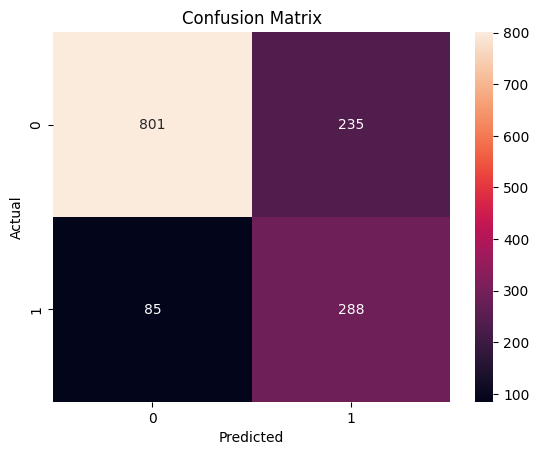

In [165]:
# Evaluate the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled_featEng)

report = classification_report(y_test_featEng, predictions)
matrix = confusion_matrix(y_test_featEng, predictions)
roc_score = roc_auc_score(y_test_featEng,predictions)
roc_score = roc_score *100

# Display results
print("### Best RandomForestClassifier model ###")
print("Classification Report:\n", report)
print("")
print(f"The ROC_AUC score :{roc_score:.2f}%")

print()
sns.heatmap(data=matrix, annot=True, fmt=".6g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.show()

1. Judging from the previous results of the model evaluation with the original data, we can say there was no much improvements as Accuracy is still 77%, and same values for precision and recall for the class 1. 
2. Therefore , the original results and evaluation outcome is optimum in this case.
3. Deployment of the developed model for CONNECT-TEL, will help address the issue of churn , identify potential customers early and implement necessary precautions. 